In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# 1. feladat

![1_1_1.JPG](1_1_1.JPG)

Feltétel: T(T(vektor))=vektor teljesül az alábbi próbáknál

In [2]:
def tukrozes(n,v,p=np.matrix([[0],[0],[0]])):
    n=n/np.linalg.norm(n)
    d=-p.T*n
    vp=np.matrix([[v[0,0]],
                  [v[1,0]],
                  [v[2,0]],
                  [1]])

    mtp=np.matrix(
    [[1-2*n[0,0]**2  , -2*n[0,0]*n[1,0] , -2*n[0,0]*n[2,0] , -2*n[0,0]*d[0,0]],
     [-2*n[0,0]*n[1,0] , 1-2*n[1,0]**2  , -2*n[1,0]*n[2,0] , -2*n[1,0]*d[0,0]],
     [-2*n[0,0]*n[2,0] , -2*n[1,0]*n[2,0] , 1-2*n[2,0]**2  , -2*n[2,0]*d[0,0]],
     [     0       ,      0       ,       0      ,      1   ]])
    
    vpp=mtp*vp
    vv=np.matrix([[vpp[0,0]],[vpp[1,0]],[vpp[2,0]]])
    return vv

In [3]:
v=np.matrix([[1],[0],[0]])
n=np.matrix([[-1],[0],[0]])
v2=tukrozes(n,v)
v3=tukrozes(n,v2)
print(v)
print(v2)
print(v3)

[[1]
 [0]
 [0]]
[[-1.]
 [ 0.]
 [ 0.]]
[[1.]
 [0.]
 [0.]]


In [4]:
v=np.matrix([[1],[2],[3]])
n=np.matrix([[1],[2],[3]])
p=np.matrix([[1],[2],[3]])
v2=tukrozes(n,v,p)
v3=tukrozes(n,v2,p)
print(v)
print(v2)
print(v3)

[[1]
 [2]
 [3]]
[[1.]
 [2.]
 [3.]]
[[1.]
 [2.]
 [3.]]


In [5]:
v=np.matrix([[1],[2],[3]])
n=np.matrix([[1],[2],[3]])
v2=tukrozes(n,v)
v3=tukrozes(n,v2)
print(v)
print(v2)
print(v3)

[[1]
 [2]
 [3]]
[[-1.]
 [-2.]
 [-3.]]
[[1.]
 [2.]
 [3.]]


In [6]:
a=np.matrix([[1],[2],[13]])
n=np.matrix([[4],[5],[1]])
a2=tukrozes(n,a)
a3=tukrozes(n,a2)
print(a)
print(a2)
print(a3)

[[ 1]
 [ 2]
 [13]]
[[-4.14285714]
 [-4.42857143]
 [11.71428571]]
[[ 1.]
 [ 2.]
 [13.]]


# 2. feladat

In [7]:
def forgat_x(v, theta):

    mfx=np.matrix(
    [[       1        ,          0       ,         0       ],
     [       0        ,  math.cos(theta) , -math.sin(theta)],
     [       0        ,  math.sin(theta) ,  math.cos(theta)]])
    return mfx*v

In [8]:
def forgat_y(v, theta):

    mfy=np.matrix(
     [[math.cos(theta) ,          0      , math.sin(theta)],
     [       0         ,          1      ,        0       ],
     [-math.sin(theta) , math.sin(theta) ,  math.cos(theta)]])
    return mfy*v

In [9]:
def forgat_z(v, theta):

    mfz=np.matrix(
    [[math.cos(theta) , -math.sin(theta) , 0],
     [math.sin(theta) ,  math.cos(theta) , 0],
     [       0        ,          0       , 1]])
    return mfz*v

In [10]:
#forgatás z tengelyre kipróbálva, addíciós tulajdonság működik
v=np.matrix([[4],[23],[7]])
v2=forgat_z(v,1.5)
v3=forgat_z(v2,0.4)
v4=forgat_z(v,1.9)
print(v3)
print(v4)

[[-23.05806028]
 [ -3.65045969]
 [  7.        ]]
[[-23.05806028]
 [ -3.65045969]
 [  7.        ]]


In [11]:
#különböző tengelyeken végzett forgatások sorrendje nem felcserélhető!
v=np.matrix([[4],[23],[7]])
v2=forgat_z(v,1.5)
v3=forgat_x(v2,0.4)
v4=forgat_y(v3,0.7)
v5=forgat_x(v,0.4)
v6=forgat_y(v5,0.7)
v7=forgat_z(v6,1.5)
print(v4)
print(v7)

[[-11.76822436]
 [  2.44761188]
 [ 22.77863656]]
[[-17.49385964]
 [ 14.25610788]
 [ 21.09607138]]


# 3. feladat

In [12]:
#A 2018 tag elveszik.
#A problémát a nagyságrendek közötti különbség és a számítógépek számábrázolása jelenti

1e23+2018-1e23

0.0

In [13]:
10**23+2018-10**23

2018

In [14]:
math.fsum([1e23,2018,-1e23])

2018.0

In [15]:
0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1

0.9999999999999999

In [16]:
a=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
math.fsum(a)

1.0

In [17]:
def okos_osszeado(szamlista):
    "Egy listában tárolom az összeadás részeit a folyamat során, majd a végén összegzem"

    reszek = []               # rendezett tagjai az összeadás pillanatnyi eredményeinek (abszolútérték szerint pakolgat)
    for a in szamlista:
        i = 0
        for b in reszek:
            if abs(a) < abs(b):
                a, b = b, a
            print("a és b: %f  -  %f" %(a,b)) #szemléltetés
            felso = a + b #a+b maxja (abszolútértékben)
            also = b - (felso - a) #a maradék
            print("felso és also: %f  -  %f" %(felso,also)) #szemléltetés
            if also:
                reszek[i] = also #itt kerül be a maradék a reszek listába
                i += 1
            a = felso
        reszek[i:] = [a] #itt kerül be az a+b max a reszek listába
        print("reszek:") #szemléltetés
        print((reszek)) #szemléltetés
    return sum(reszek, 0.0) #végső összegzés, 0.0, hogy float legyen (típuskonverzió)

print(okos_osszeado([1e23,0.1,1e-23,0.1,1e23,0.1,1e-23,0.1,-1e23,-1e23]))

reszek:
[1e+23]
a és b: 99999999999999991611392.000000  -  0.100000
felso és also: 99999999999999991611392.000000  -  0.100000
reszek:
[0.1, 1e+23]
a és b: 0.100000  -  0.000000
felso és also: 0.100000  -  0.000000
a és b: 99999999999999991611392.000000  -  0.100000
felso és also: 99999999999999991611392.000000  -  0.100000
reszek:
[1e-23, 0.1, 1e+23]
a és b: 0.100000  -  0.000000
felso és also: 0.100000  -  0.000000
a és b: 0.100000  -  0.100000
felso és also: 0.200000  -  0.000000
a és b: 99999999999999991611392.000000  -  0.200000
felso és also: 99999999999999991611392.000000  -  0.200000
reszek:
[1e-23, 0.2, 1e+23]
a és b: 99999999999999991611392.000000  -  0.000000
felso és also: 99999999999999991611392.000000  -  0.000000
a és b: 99999999999999991611392.000000  -  0.200000
felso és also: 99999999999999991611392.000000  -  0.200000
a és b: 99999999999999991611392.000000  -  99999999999999991611392.000000
felso és also: 199999999999999983222784.000000  -  0.000000
reszek:
[1e-23, 0

# 4. feladat

In [18]:
def pontgenerator(N=1000):
    x=[]
    y=[]
    for i in range(N):
        x.append(random.uniform(0,1))
        y.append(random.uniform(0,1))
    return x,y

x,y=pontgenerator()

Text(0, 0.5, 'y tengely')

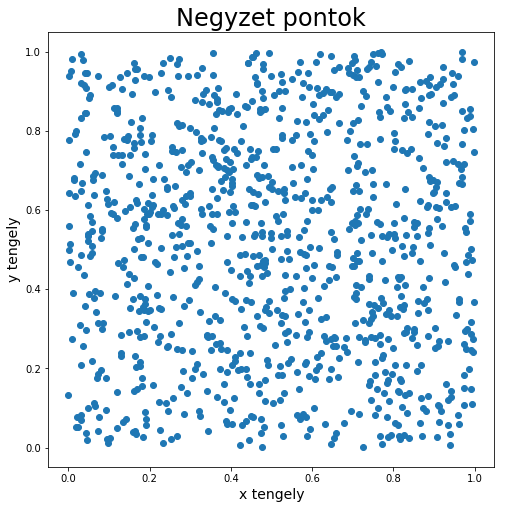

In [19]:
plt.figure(figsize=(8,8))
plt.plot(x,y,linestyle='', marker='o')
plt.title("Negyzet pontok",fontsize=24)
plt.xlabel("x tengely",fontsize=14)
plt.ylabel("y tengely",fontsize=14)

In [20]:
np.savetxt('negyzet_pontok.txt',[x,y])

In [21]:
def eloszlas(x,y):
    hosszok=[0]
    for i in range(len(x)):
        hossz_min=2
        for j in range(len(x)):
            hossz=math.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
            if (hossz<hossz_min and i!=j):
                hossz_min=hossz
        hosszok.append(hossz_min)
    hosszok.sort()
    return hosszok,range(len(x)+1)

hosszok,ydb=eloszlas(x,y)

Text(0, 0.5, 'y tengely')

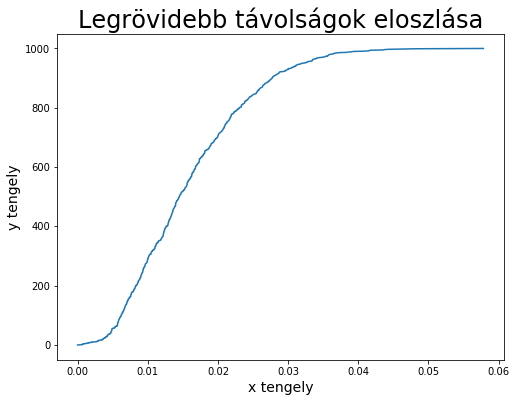

In [22]:
plt.figure(figsize=(8,6))
plt.plot(hosszok,ydb)
plt.title("Legrövidebb távolságok eloszlása",fontsize=24)
plt.xlabel("x tengely",fontsize=14)
plt.ylabel("y tengely",fontsize=14)

# 5. feladat

In [23]:
a=-3*math.sqrt(7)
a

-7.937253933193772

In [44]:
type(a)

float

In [41]:
#B=10 , p=2
a_10=-7.9e0
hiba_10_abs=a_10-a
hiba_10_rel=hiba_10_abs/a
print("Abszolút hiba: %f" %(hiba_10_abs))
print("Relatív hiba: {}%".format(100*hiba_10_rel))
#Ha a program levág, akkor 0<= hiba <= 1e(k-p+1) (itt ez 0.1)
#Ha a program kerekít, akkor 0<= hiba <= 5e(k-p) (itt ez 0.05)
#Itt a pontos abszolut hiba = hiba_10_abs

Abszolút hiba: 0.037254
Relatív hiba: -0.46935544090349707%


In [46]:
#B=16 , p=4
#https://gregstoll.com/~gregstoll/floattohex/

b=0xc0fdfdfc
b

3237871100

In [48]:
ALPHABET = \
  "0123456789abcdefghijklmnopqrstuvwxyz"

def encode (n):
    try:
        return ALPHABET [n]
    except IndexError:
        raise Exception ("cannot encode: %s" % n)

def dec_to_base (dec = 0, base = 16):
    if dec < base:
        return encode (dec)
    else:
        return dec_to_base (dec // base, base) + encode (dec % base)

In [51]:
dec_to_base (275, 3)

'101012'

# 6. feladat

![1_6_1.JPG](1_6_1.JPG)

In [60]:
#x**2-10**8*x+1
a=1
b=-10**8
c=1

In [65]:
y1=(10**8+math.sqrt(10**16-4))/2
y2=(10**8-math.sqrt(10**16-4))/2
print(y1)
print(y2)

100000000.0
7.450580596923828e-09


In [66]:
z1=2/(10**8-math.sqrt(10**16-4))
z2=2/(10**8+math.sqrt(10**16-4))
print(z1)
print(z2)

134217728.0
1e-08


In [67]:
#helyes megoldáspár a Viete-formulák alapján: x1+x2=100000000 , x1*x2=1
print(z1+z2)
print(z1*z2)

print(y1+y2)
print(y1*y2)

print(z1+y2)
print(z1*y2)

print(y1+z2)
print(y1*z2)

134217728.0
1.34217728
100000000.0
0.7450580596923828
134217728.0
1.0
100000000.00000001
1.0


In [68]:
#Nyertesek:
x1=y1
x2=z2
print(x1)
print(x2)

100000000.0
1e-08


# 7. feladat

A Morze-kódban használt mintázatok időtartama erősen korrelál a mintázat által kódolt betű tipikus angol szövegbeli előfordulási valószínűségével. Mutasd meg mennyire teljesül ez az összefüggés

Az eredmény erős negatív korreláció: -0.82


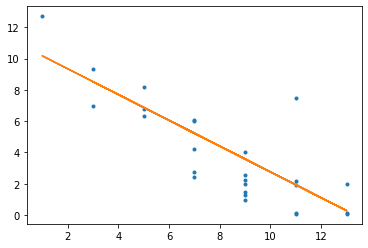

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#abc gyakorisag
abc=np.array([8.167,1.492,2.202,4.253,12.702,2.228,2.015,6.094,6.966,0.153,1.292,4.025,2.406,6.749,7.507,1.929,0.095,5.987,6.327,9.356,2.758,0.978,2.560,0.150,1.994,0.077])

#morse abc jeleinek hossza
morse_abc=np.array([5,9,11,7,1,9,9,7,3,13,9,9,7,5,11,11,13,7,5,3,7,9,9,11,13,11])

corr = np.corrcoef(morse_abc, abc)

plt.plot(morse_abc,abc,'.')
plt.plot(morse_abc,corr[0,1]*morse_abc+11)
print(f"Az eredmény erős negatív korreláció: {round(corr[0,1],2)}")